In [1]:
from data_creation.experiments.moore_et_al_1993 import generate_stimulus, SIGNAL_FREQUENCIES, SIGNAL_LEVELS
from data_creation.time.time import generate_time_vector

sinusoid_frequency = SIGNAL_FREQUENCIES[3]
sinusoid_level = SIGNAL_LEVELS[4]

fs = 10000  # sampling frequency
t = generate_time_vector(0., 0.7, fs)
x_nogap = generate_stimulus(t,
                            sinusoid_frequency=sinusoid_frequency,
                            sinusoid_level=sinusoid_level)
x_gap = generate_stimulus(t,
                          sinusoid_frequency=sinusoid_frequency,
                          sinusoid_level=sinusoid_level,
                          gap_length=10e-3)

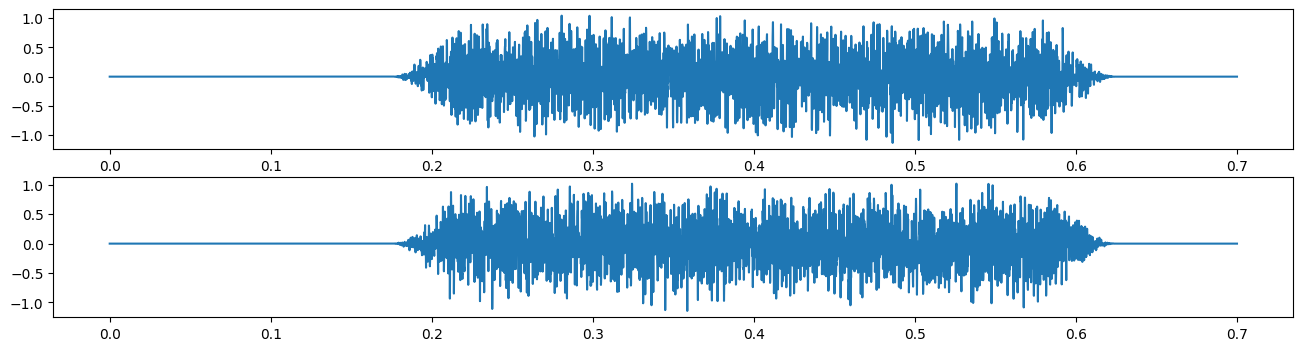

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(16, 4))
ax[0].plot(t, x_nogap)
ax[1].plot(t, x_gap)
plt.show()

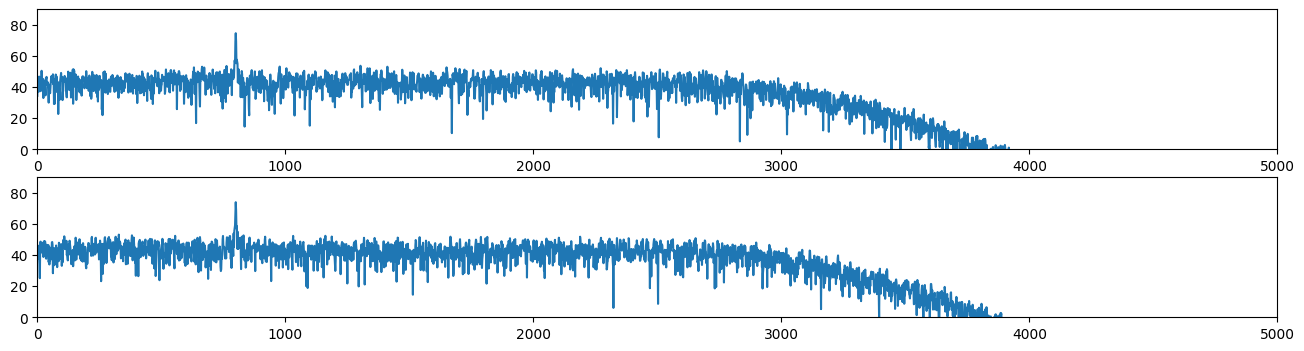

In [3]:
from data_creation.calibration.spectrum import get_spectrum
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(16, 4))
ax[0].plot(*get_spectrum(t, x_nogap, get_abs=True))
ax[0].set_xlim([0, fs // 2])
ax[0].set_ylim([0, 90])
ax[1].plot(*get_spectrum(t, x_gap, get_abs=True))
ax[1].set_xlim([0, fs // 2])
ax[1].set_ylim([0, 90])
plt.show()

## Full generation of experiment

The following section generates a full set of stimuli for evaluating a model on.

In [7]:
import os
import numpy as np
from scipy.io.wavfile import write
from data_creation.files.naming import embed_gap_in_filename, get_next_non_existent

fs = 100000  # sampling frequency
t = generate_time_vector(0., 0.7, fs)

output_basepath = '/Users/jenslindahl/Downloads/moore_et_al_1993'

gap_lengths = np.linspace(0, 39e-3, 40)
repetitions = 10

for frequency in SIGNAL_FREQUENCIES:
    frequency_folder = os.path.join(output_basepath,
                                    f'freq_{frequency}hz')
    if not os.path.exists(frequency_folder):
        os.mkdir(frequency_folder)
    for level in SIGNAL_LEVELS:
        level_folder = os.path.join(frequency_folder,
                                    f'level_{level}dB')
        if not os.path.exists(level_folder):
            os.mkdir(level_folder)
        base_fn = os.path.join(level_folder,
                               'stimulus.wav')
        for gap_length in gap_lengths:
            for n in range(repetitions):
                fn = embed_gap_in_filename(base_fn,
                                           gap_position=400e-3,
                                           gap_duration=gap_length)
                fn = get_next_non_existent(fn)

                print(fn)
                write(fn,
                      rate=fs,
                      data=generate_stimulus(t,
                                             sinusoid_frequency=frequency,
                                             sinusoid_level=level,
                                             gap_length=gap_length))

/Users/jenslindahl/Downloads/moore_et_al_1993/freq_100hz/level_25dB/stimulus_0.00ms_400.00ms.wav
/Users/jenslindahl/Downloads/moore_et_al_1993/freq_100hz/level_25dB/stimulus_0.00ms_400.00ms-1.wav
/Users/jenslindahl/Downloads/moore_et_al_1993/freq_100hz/level_25dB/stimulus_0.00ms_400.00ms-2.wav
/Users/jenslindahl/Downloads/moore_et_al_1993/freq_100hz/level_25dB/stimulus_0.00ms_400.00ms-3.wav
/Users/jenslindahl/Downloads/moore_et_al_1993/freq_100hz/level_25dB/stimulus_0.00ms_400.00ms-4.wav
/Users/jenslindahl/Downloads/moore_et_al_1993/freq_100hz/level_25dB/stimulus_0.00ms_400.00ms-5.wav
/Users/jenslindahl/Downloads/moore_et_al_1993/freq_100hz/level_25dB/stimulus_0.00ms_400.00ms-6.wav
/Users/jenslindahl/Downloads/moore_et_al_1993/freq_100hz/level_25dB/stimulus_0.00ms_400.00ms-7.wav
/Users/jenslindahl/Downloads/moore_et_al_1993/freq_100hz/level_25dB/stimulus_0.00ms_400.00ms-8.wav
/Users/jenslindahl/Downloads/moore_et_al_1993/freq_100hz/level_25dB/stimulus_0.00ms_400.00ms-9.wav
/Users/jensl